# A/B Testing using Chi - Square Test

In [ ]:
# Implementing Chi Square Statistical Test for self-generated Click Through data for A/B Testing

In [60]:
## There are a few questions we are trying to answer through this. 
# 1. How does the p-value change as we are collectig the sample?
# 2. What are the drawbacks of using this particular statistical test.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [62]:
# p1: probability of clicks for Group-1
# p2: probability of clicks for Group-2

class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
    def next(self):  # Returns the result of whether a person clicked on advertisement or not
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2


def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0] # Contingency table
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum() #Chi Square Test Statistic
  p = 1 - chi2.cdf(x=c2, df=1)
  return p




In [63]:
def run_experiment(p1,p2,N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)                  # Intialize the array of p-values
    T = np.zeros((2, 2)).astype(np.float32) # Initialize the contingency table
    # loop for each trial
    for i in range(N):
        c1, c2 = data.next()
        
        # Update the contingency table
        T[0,c1] += 1
        T[1,c2] += 1
        
        # ignore the first 10 values
        if i < 10:  #B'ce We can't get a proper p-value if the samples are too less
          p_values[i] = None #Setting p_values to zero might not help us while calculating chi square test statistic
        
        else:
          p_values[i] = get_p_value(T)
    plt.plot(p_values) # plotting p-values
    plt.plot(np.ones(N)*0.05) # plotting threshold
    plt.show()
        

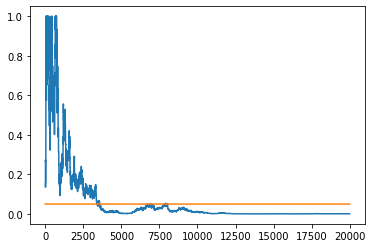

In [64]:
run_experiment(0.1, 0.11, 20000)

In [65]:
# p-value looks problematic, (It's going below the threshold)

In [66]:
# Implementing Chi Square Statistical Test for certain available Click Through data for A/B Testing

In [67]:
import numpy as np
import pandas as pd
from scipy.stats import chi2, chi2_contingency

In [68]:
## To obtain p-value

def get_p_value(T):
    p = chi2_contingency(T, correction = False) # Calculates the Chi-Square Test Statistic
    return p

In [69]:
## Importing the data 

df = pd.read_csv("/Users/snigdhacheekoty/Documents/GitHub/AB_Testing/advertisement_clicks.csv")
df.head(10)

,advertisement,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1
5,A,0
6,B,0
7,A,1
8,B,0
9,A,0


In [70]:
df.tail(10)

,advertisement,action
1990,A,1
1991,A,0
1992,A,0
1993,A,0
1994,A,1
1995,A,0
1996,A,0
1997,A,0
1998,A,1
1999,A,0


In [71]:
## We need to create a numpy array with columns: click, no_click and rows: Groups A and B
a = df[df['advertisement'] == 'A']
b = df[df['advertisement'] == 'B']
a = a["action"]
b = b["action"]


#aggregating the click and no-click values
A_click = a.sum()
A_noclick = a.size - a.sum()
B_click = b.sum()
B_noclick = b.size - b.sum()

# Numpy array for generating a contingency table
T = np.array([[A_click,A_noclick], [B_click, B_noclick]])

In [73]:
## Printing the Chi-Test Statistic, p-value, degrees of freedom in the same order
print(get_p_value(T))


(10.332683816299898, 0.0013069502732125406, 1, array([[338., 662.],
       [338., 662.]]))


In [ ]:
# CONCLUSION: Since the p-value < Significance Level, the difference of CTR's between advertisements A and B....
# ..... are statistically significant!